## Preprocesamiento de datos

### Eliminación de duplicados

In [28]:
import pandas as pd

# Cargar el conjunto de datos
df = pd.read_csv("wine.csv")

# Eliminar duplicados
df.drop_duplicates(inplace=True)

### Rellenar o eliminar valores Nulos

In [30]:
# Revisar valores nulos
print(df.isnull().sum())

# Rellenar valores nulos con la media de la columna
df.fillna(df.mean(), inplace=True)

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64


### Corrección de errores de formato

In [32]:
# Revisar tipos de datos
print(df.dtypes)

# Convertir columnas a tipos adecuados si es necesario
df['Wine'] = df['Wine'].astype('category')

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object


## Transformación de datos

### Normalización de las variables

In [35]:
from sklearn.preprocessing import RobustScaler

# Normalizar las variables numéricas
scaler = RobustScaler()
df[['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline']] = scaler.fit_transform(df[['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline']])

### Creación de nuevas variables

In [37]:
# Crear una nueva variable que combine información relevante
df['Alcohol_Acidity_Ratio'] = df['Alcohol'] / df['Malic.acid']

### Filtrado de columnas irrelevantes

In [39]:
# Filtrar columnas que no son necesarias para el análisis
# Para ello, vamos a ver cuales tienen menos correlación con la clase 'Wine'

# Número de ejemplos de clase Wine
df["Wine"].value_counts()

Wine
2    71
1    59
3    48
Name: count, dtype: int64

In [40]:
# Transformamos la variable de salida a numérica para calcular correlaciones
X = df.copy()
X['Wine'] = X['Wine'].factorize()[0]

In [41]:
# Calculamos correlaciones
corr_matrix = X.corr()
corr_matrix["Wine"].sort_values(ascending=False)

Wine                     1.000000
Acl                      0.517859
Nonflavanoid.phenols     0.489109
Malic.acid               0.437776
Color.int                0.265668
Ash                     -0.049643
Alcohol_Acidity_Ratio   -0.081012
Mg                      -0.209179
Alcohol                 -0.328222
Proanth                 -0.499130
Hue                     -0.617369
Proline                 -0.633717
Phenols                 -0.719163
OD                      -0.788230
Flavanoids              -0.847498
Name: Wine, dtype: float64

In [42]:
X.corr()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Alcohol_Acidity_Ratio
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717,-0.081012
Alcohol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,0.156291
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,-0.026162
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,0.047775
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,-0.132290
Mg,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.016100
Phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,0.087508
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,0.075846
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,-0.025030
Proanth,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,0.147476


In [43]:
# Estas son las que tienen mayor correlación
corr_matrix[corr_matrix["Wine"] > 0.05]

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline,Alcohol_Acidity_Ratio
Wine,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717,-0.081012
Malic.acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,-0.026162
Acl,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,-0.132290
Nonflavanoid.phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,-0.025030
Color.int,0.265668,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.059146


## Minería de datos - Árbol de decisión

### Aplicación del árbol de decisión

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X = df.drop('Wine', axis=1)
y = df['Wine'] 

# Dividir el conjunto de datos
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.4, random_state=42)

# Aplicar el árbol de decisión
clf = DecisionTreeClassifier(max_depth=20, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=20, random_state=42)

### Visualización del árbol

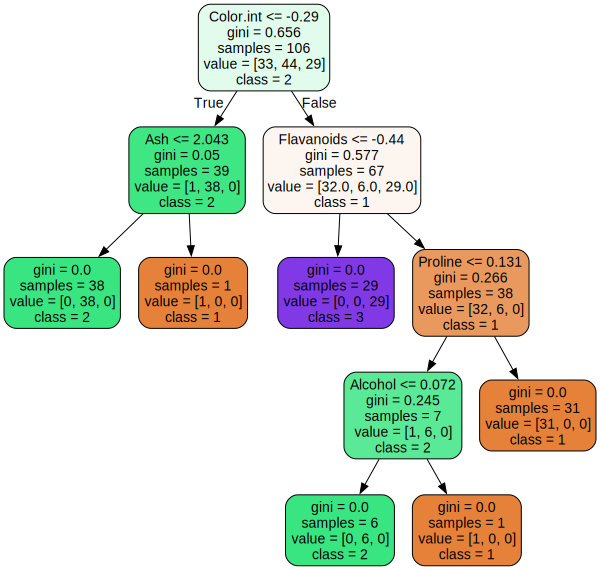

In [48]:
# Importar librerías para visualizar el árbol
from sklearn.tree import export_graphviz
from graphviz import Source

# Exportar el árbol a un archivo .dot
export_graphviz(
    clf,
    out_file='tree.dot',
    feature_names=X.columns,
    class_names=[str(cls) for cls in sorted(y.unique())],  # Convertir a strings
    rounded=True,
    filled=True
)

# Visualizar el árbol
Source.from_file('tree.dot')